In [1]:
fmri_data_labels = ['NKI-1400_HY_CompCorGSR',
                    'NKI-1400_HY_CompCor',
                    'HCP_Shine1_Session1_CleanGSR',
                    'HCP_Shine1_Session2_CleanGSR',
                    'HCP_Shine2_Session1_CleanGSR']
results_dir = '/home/despoB/dlurie/Projects/timescale_hierarchy/results'
resource_dir = '/home/despoB/dlurie/Projects/timescale_hierarchy/data/resources'

In [2]:
import cmocean
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from nilearn import surface, plotting, image, regions

/home/despoB/dlurie/anaconda3/envs/timescale/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

In [4]:
roi_vols = np.genfromtxt(f'{resource_dir}/BNA-maxprob-thr25-2mm_ROI_volumes.txt')

In [5]:
l1_resid_store = []
for fmri_data_label in fmri_data_labels:    
    ts_df = pd.read_csv(f'{results_dir}/timescales/{fmri_data_label}_BNA_timescale_df.csv')

    df = pd.DataFrame([ts_df.lag1_median, roi_vols]).T
    df.columns = ['lag1','roiv']

    lag1_resid = smf.ols('lag1 ~ roiv', data=df).fit().resid

    l1_resid_store.append(lag1_resid+np.mean(ts_df.lag1_median))
    

In [6]:
l1_resid_store = np.array(l1_resid_store)

In [7]:
l1_df = pd.DataFrame(l1_resid_store)

In [8]:
l1_df = l1_df.T

In [9]:
l1_df.columns = ['NKI_CCGSR', 'NKI_CC','HCP_S1S1','HCP_S1S2','HCP_S2S1']

In [10]:
labels_df = pd.read_csv('/home/despo/dlurie/Data/reference/Brainnetome/BNA/subregion_func_network_Yeo.csv')

### NKI Dataframe

In [11]:
l1_NKI_labeled_df = pd.DataFrame([l1_df.NKI_CCGSR.values,labels_df.region.values, labels_df.subregion_name.values],
                                 index=['lag1', 'region','subregion'])

In [12]:
l1_NKI_labeled_df = l1_NKI_labeled_df.T

#### Cortex

In [13]:
l1_NKI_labeled_df_cx = l1_NKI_labeled_df[:210]

In [14]:
l1_NKI_labeled_df_cx_sorted = l1_NKI_labeled_df_cx.sort_values(by='lag1', ascending=False)

In [15]:
nki_thresh_top = stats.scoreatpercentile(l1_NKI_labeled_df_cx.lag1,80)
nki_thresh_bottom = stats.scoreatpercentile(l1_NKI_labeled_df_cx.lag1,20)

In [16]:
nki_top_df = l1_NKI_labeled_df_cx_sorted[l1_NKI_labeled_df_cx_sorted.lag1 >= nki_thresh_top]
nki_top_set = set(nki_top_df.region)

In [17]:
nki_bottom_df = l1_NKI_labeled_df_cx_sorted[l1_NKI_labeled_df_cx_sorted.lag1 <= nki_thresh_bottom]
nki_bottom_set = set(nki_bottom_df.region)

#### Subcortex

In [75]:
l1_NKI_labeled_df_sc = l1_NKI_labeled_df[210:]

In [76]:
l1_NKI_labeled_df_sc_sorted = l1_NKI_labeled_df_sc.sort_values(by='lag1', ascending=False)

In [77]:
nki_scthresh_top = stats.scoreatpercentile(l1_NKI_labeled_df_sc.lag1,80)
nki_scthresh_bottom = stats.scoreatpercentile(l1_NKI_labeled_df_sc.lag1,20)

In [78]:
nki_sctop_df = l1_NKI_labeled_df_sc_sorted[l1_NKI_labeled_df_sc_sorted.lag1 >= nki_scthresh_top]
nki_sctop_set = set(nki_sctop_df.region)

In [79]:
nki_scbottom_df = l1_NKI_labeled_df_sc_sorted[l1_NKI_labeled_df_sc_sorted.lag1 <= nki_scthresh_bottom]
nki_scbottom_set = set(nki_scbottom_df.region)

### HCP Dataframe

In [18]:
l1_HCP_labeled_df = pd.DataFrame([l1_df.HCP_S1S1.values,labels_df.region.values, labels_df.subregion_name.values],
                                 index=['lag1', 'region','subregion'])

In [19]:
l1_HCP_labeled_df = l1_HCP_labeled_df.T

#### Cortex

In [20]:
l1_HCP_labeled_df_cx = l1_HCP_labeled_df[:210]

In [21]:
l1_HCP_labeled_df_cx_sorted = l1_HCP_labeled_df_cx.sort_values(by='lag1', ascending=False)

In [22]:
hcp_thresh_top = stats.scoreatpercentile(l1_HCP_labeled_df_cx.lag1,80)
hcp_thresh_bottom = stats.scoreatpercentile(l1_HCP_labeled_df_cx.lag1,20)

In [23]:
hcp_top_df = l1_HCP_labeled_df_cx_sorted[l1_HCP_labeled_df_cx_sorted.lag1 >= hcp_thresh_top]
hcp_top_set = set(hcp_top_df.region)

In [24]:
hcp_bottom_df = l1_HCP_labeled_df_cx_sorted[l1_HCP_labeled_df_cx_sorted.lag1 <= hcp_thresh_bottom]
hcp_bottom_set = set(hcp_bottom_df.region)

#### Subcortex

In [82]:
l1_HCP_labeled_df_sc = l1_HCP_labeled_df[210:]

In [83]:
l1_HCP_labeled_df_sc_sorted = l1_HCP_labeled_df_sc.sort_values(by='lag1', ascending=False)

In [84]:
hcp_scthresh_top = stats.scoreatpercentile(l1_HCP_labeled_df_sc.lag1,80)
hcp_scthresh_bottom = stats.scoreatpercentile(l1_HCP_labeled_df_sc.lag1,20)

In [85]:
hcp_sctop_df = l1_HCP_labeled_df_sc_sorted[l1_HCP_labeled_df_sc_sorted.lag1 >= hcp_scthresh_top]
hcp_sctop_set = set(hcp_sctop_df.region)

In [86]:
hcp_scbottom_df = l1_HCP_labeled_df_sc_sorted[l1_HCP_labeled_df_sc_sorted.lag1 <= hcp_scthresh_bottom]
hcp_scbottom_set = set(hcp_scbottom_df.region)

### Intersection of sets

#### Cortex

In [30]:
top_regions = list(set.intersection(nki_top_set, hcp_top_set))

In [42]:
top_indices = list(labels_df[labels_df['region'].isin(top_regions)].index)

In [49]:
len(top_indices)

27

In [60]:
bottom_regions = list(set.intersection(nki_bottom_set, hcp_bottom_set))

In [61]:
bottom_indices = list(labels_df[labels_df['region'].isin(bottom_regions)].index)

In [62]:
len(bottom_indices)

28

In [107]:
labels_df[labels_df['region'].isin(bottom_regions)]

,Label,subregion_name,region,Yeo_7network,Yeo_17network
11,12,A9m,SFG_R_7_6,6,13
44,45,A11l,OrG_L_6_3,5,10
45,46,A11l,OrG_R_6_3,6,12
48,49,A13,OrG_L_6_5,5,10
49,50,A13,OrG_R_6_5,5,10
69,70,A38m,STG_R_6_1,5,9
72,73,TE1.0/TE1.2,STG_L_6_3,2,4
89,90,A20iv,ITG_R_7_1,5,9
93,94,A20r,ITG_R_7_3,5,9
100,101,A20cv,ITG_L_7_7,5,9


#### Subcortex

In [87]:
sctop_regions = list(set.intersection(nki_sctop_set, hcp_sctop_set))

In [88]:
sctop_indices = list(labels_df[labels_df['region'].isin(sctop_regions)].index)

In [89]:
len(sctop_indices)

3

In [103]:
labels_df[labels_df['region'].isin(sctop_regions)]

,Label,subregion_name,region,Yeo_7network,Yeo_17network
228,229,dlPu,BG_L_6_6,0,0
229,230,dlPu,BG_R_6_6,0,0
237,238,rTtha,Tha_R_8_4,0,0


In [90]:
scbottom_regions = list(set.intersection(nki_scbottom_set, hcp_scbottom_set))

In [91]:
scbottom_indices = list(labels_df[labels_df['region'].isin(scbottom_regions)].index)

In [92]:
len(scbottom_indices)

4

In [104]:
labels_df[labels_df['region'].isin(scbottom_regions)]

,Label,subregion_name,region,Yeo_7network,Yeo_17network
213,214,lAmyg,Amyg_R_2_2,0,0
216,217,cHipp,Hipp_L_2_2,0,0
217,218,cHipp,Hipp_R_2_2,0,0
232,233,mPMtha,Tha_L_8_2,0,0


In [38]:
BNA_4D_path = '/home/despoB/dlurie/Projects/timescale_hierarchy/viz/BNA_4D.nii.gz'

### Visualize (subcortex)

In [94]:
sctop_bdata = np.zeros(246)
sctop_bdata[sctop_indices] = 1

In [95]:
scbottom_bdata = np.zeros(246)
scbottom_bdata[scbottom_indices] = 1

In [96]:
scbottom_bdata = scbottom_bdata*-1

In [97]:
sctb_bdata = scbottom_bdata + sctop_bdata

In [98]:
sctb_bimg = regions.signals_to_img_maps(sctb_bdata, BNA_4D_path)

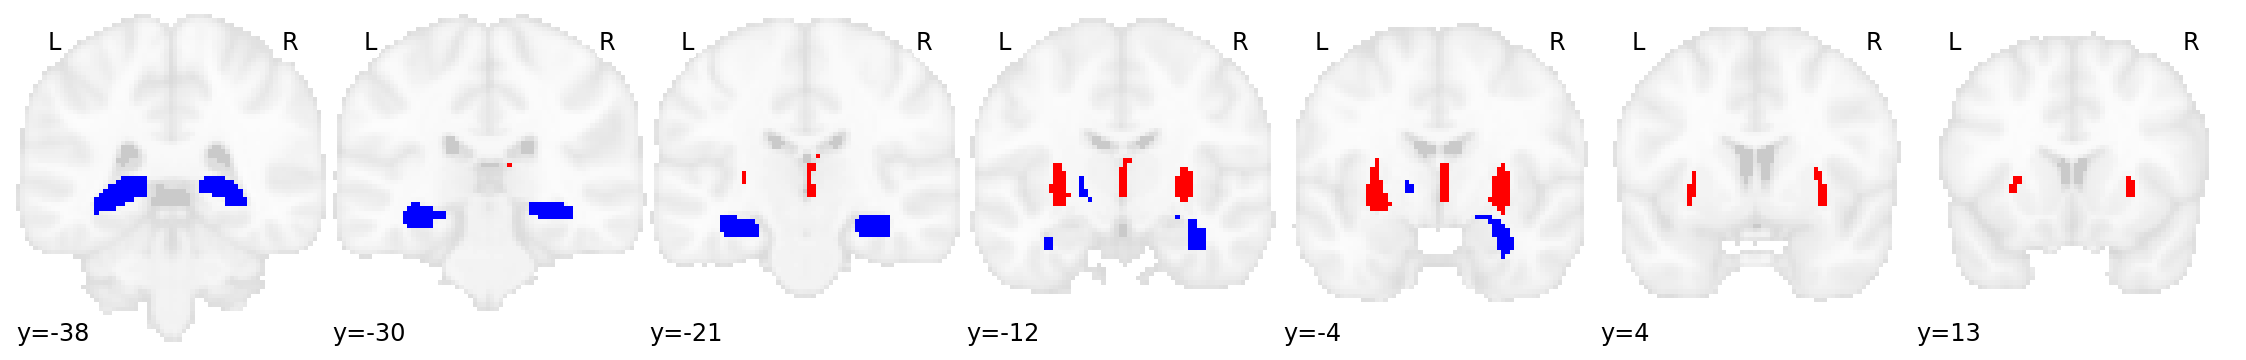

In [105]:
f = plotting.plot_roi(sctb_bimg, display_mode='y', cut_coords=np.around(np.linspace(-38, 13, 7)), cmap='bwr', threshold=1e-15, vmin=-1, vmax=1,
                      colorbar=False, alpha=1, dim=5)

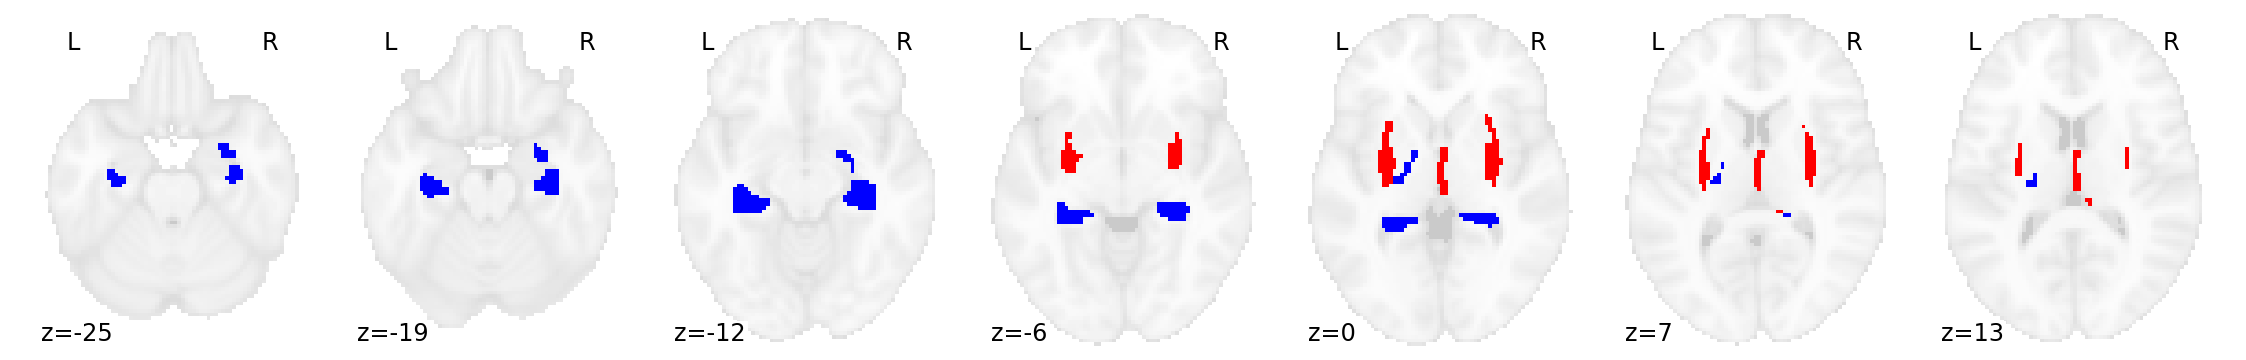

In [106]:
f = plotting.plot_roi(sctb_bimg, display_mode='z', cut_coords=np.around(np.linspace(-25, 13, 7)), cmap='bwr', threshold=1e-15, vmin=-1, vmax=1,
                      colorbar=False, alpha=1, dim=5)

### Visualize (cortex)

In [32]:
def gen_surfaces(measure, idx_lh, idx_rh):
    measure_lh = measure[:210][::2] # Select even numbered ROIs
    measure_rh = measure[:210][1::2] # Select odd numbered ROIs

    measure_lh = np.insert(measure_lh, 0, [0,0], axis=0)
    measure_rh = np.insert(measure_rh, 0, [0,0], axis=0)

    measure_map_lh = measure_lh[idx_lh]
    measure_map_rh = measure_rh[idx_rh]
    
    max_val = measure.max()
    min_val = measure.min()
    
    return measure_map_lh, measure_map_rh, max_val, min_val

In [33]:
def plot_surfaces(lh_surf, map_lh, lh_bg, rh_surf, map_rh, rh_bg, plot_cmap, plot_vmin, plot_vmax):
    fig, ax = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(20,20))
    a = plotting.plot_surf_roi(lh_infl, map_lh, hemi='left', cmap=plot_cmap, view='lateral',
                             bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[0][0])
    b = plotting.plot_surf_roi(rh_infl, map_rh, hemi='right', cmap=plot_cmap, view='lateral',
                             bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[0][1])
    c = plotting.plot_surf_roi(lh_infl, map_lh, hemi='left', cmap=plot_cmap, view='medial',
                             bg_map=lh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[1][0])
    d = plotting.plot_surf_roi(rh_infl, map_rh, hemi='right', cmap=plot_cmap, view='medial',
                             bg_map=rh_sulc, bg_on_data=True, darkness=0.6, vmin=plot_vmin, vmax=plot_vmax, threshold=1e-15, figure=fig, axes=ax[1][1])
    plt.tight_layout()

Load BNA atlas labels.

In [34]:
atlas_lh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/lh.BN_Atlas.annot')
atlas_rh = surface.load_surf_data('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/label/rh.BN_Atlas.annot')

Load surface meshes.

In [35]:
lh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/lh.inflated')
rh_infl = surface.load_surf_mesh('/home/despoB/dlurie/Data/reference/Brainnetome/BNA/BN_Atlas_freesurfer/fsaverage/surf/rh.inflated')

Load sulcus files.

In [36]:
lh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/lh.sulc')
rh_sulc = surface.load_surf_data('/home/despoB/dlurie/Data/CBIG/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/FreeSurfer5.3/fsaverage/surf/rh.sulc')

Get an index (`idx`) of the vertices for each ROI.

In [37]:
u_lh, idx_lh = np.unique(atlas_lh, return_inverse=True)
u_rh, idx_rh = np.unique(atlas_rh, return_inverse=True)

In [94]:
top_bdata = np.zeros(246)
top_bdata[top_indices] = 1

In [64]:
bottom_bdata = np.zeros(246)
bottom_bdata[bottom_indices] = 1

In [68]:
bottom_bdata = bottom_bdata*-1

In [71]:
tb_bdata = bottom_bdata + top_bdata

In [111]:
np.nonzero(tb_bdata)[0].shape

(55,)

In [72]:
tb_bimg = regions.signals_to_img_maps(tb_bdata, BNA_4D_path)

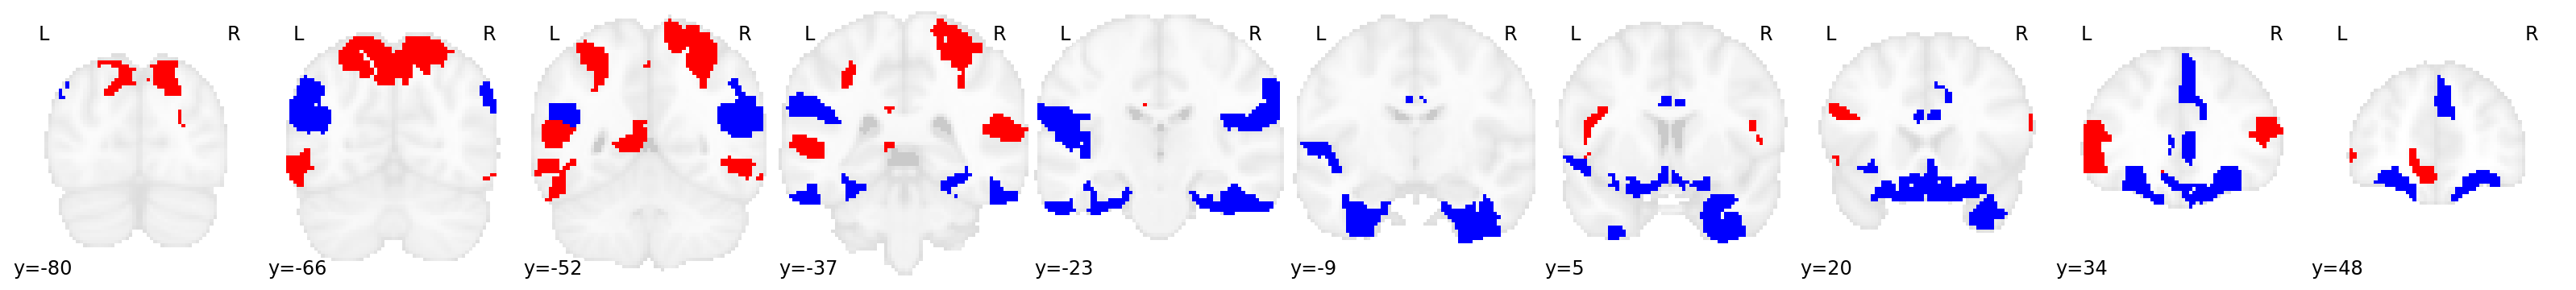

In [73]:
f = plotting.plot_roi(tb_bimg, display_mode='y', cut_coords=np.around(np.linspace(-80, 48, 10)), cmap='bwr', threshold=1e-15, vmin=-1, vmax=1,
                      colorbar=False, alpha=1, dim=5)

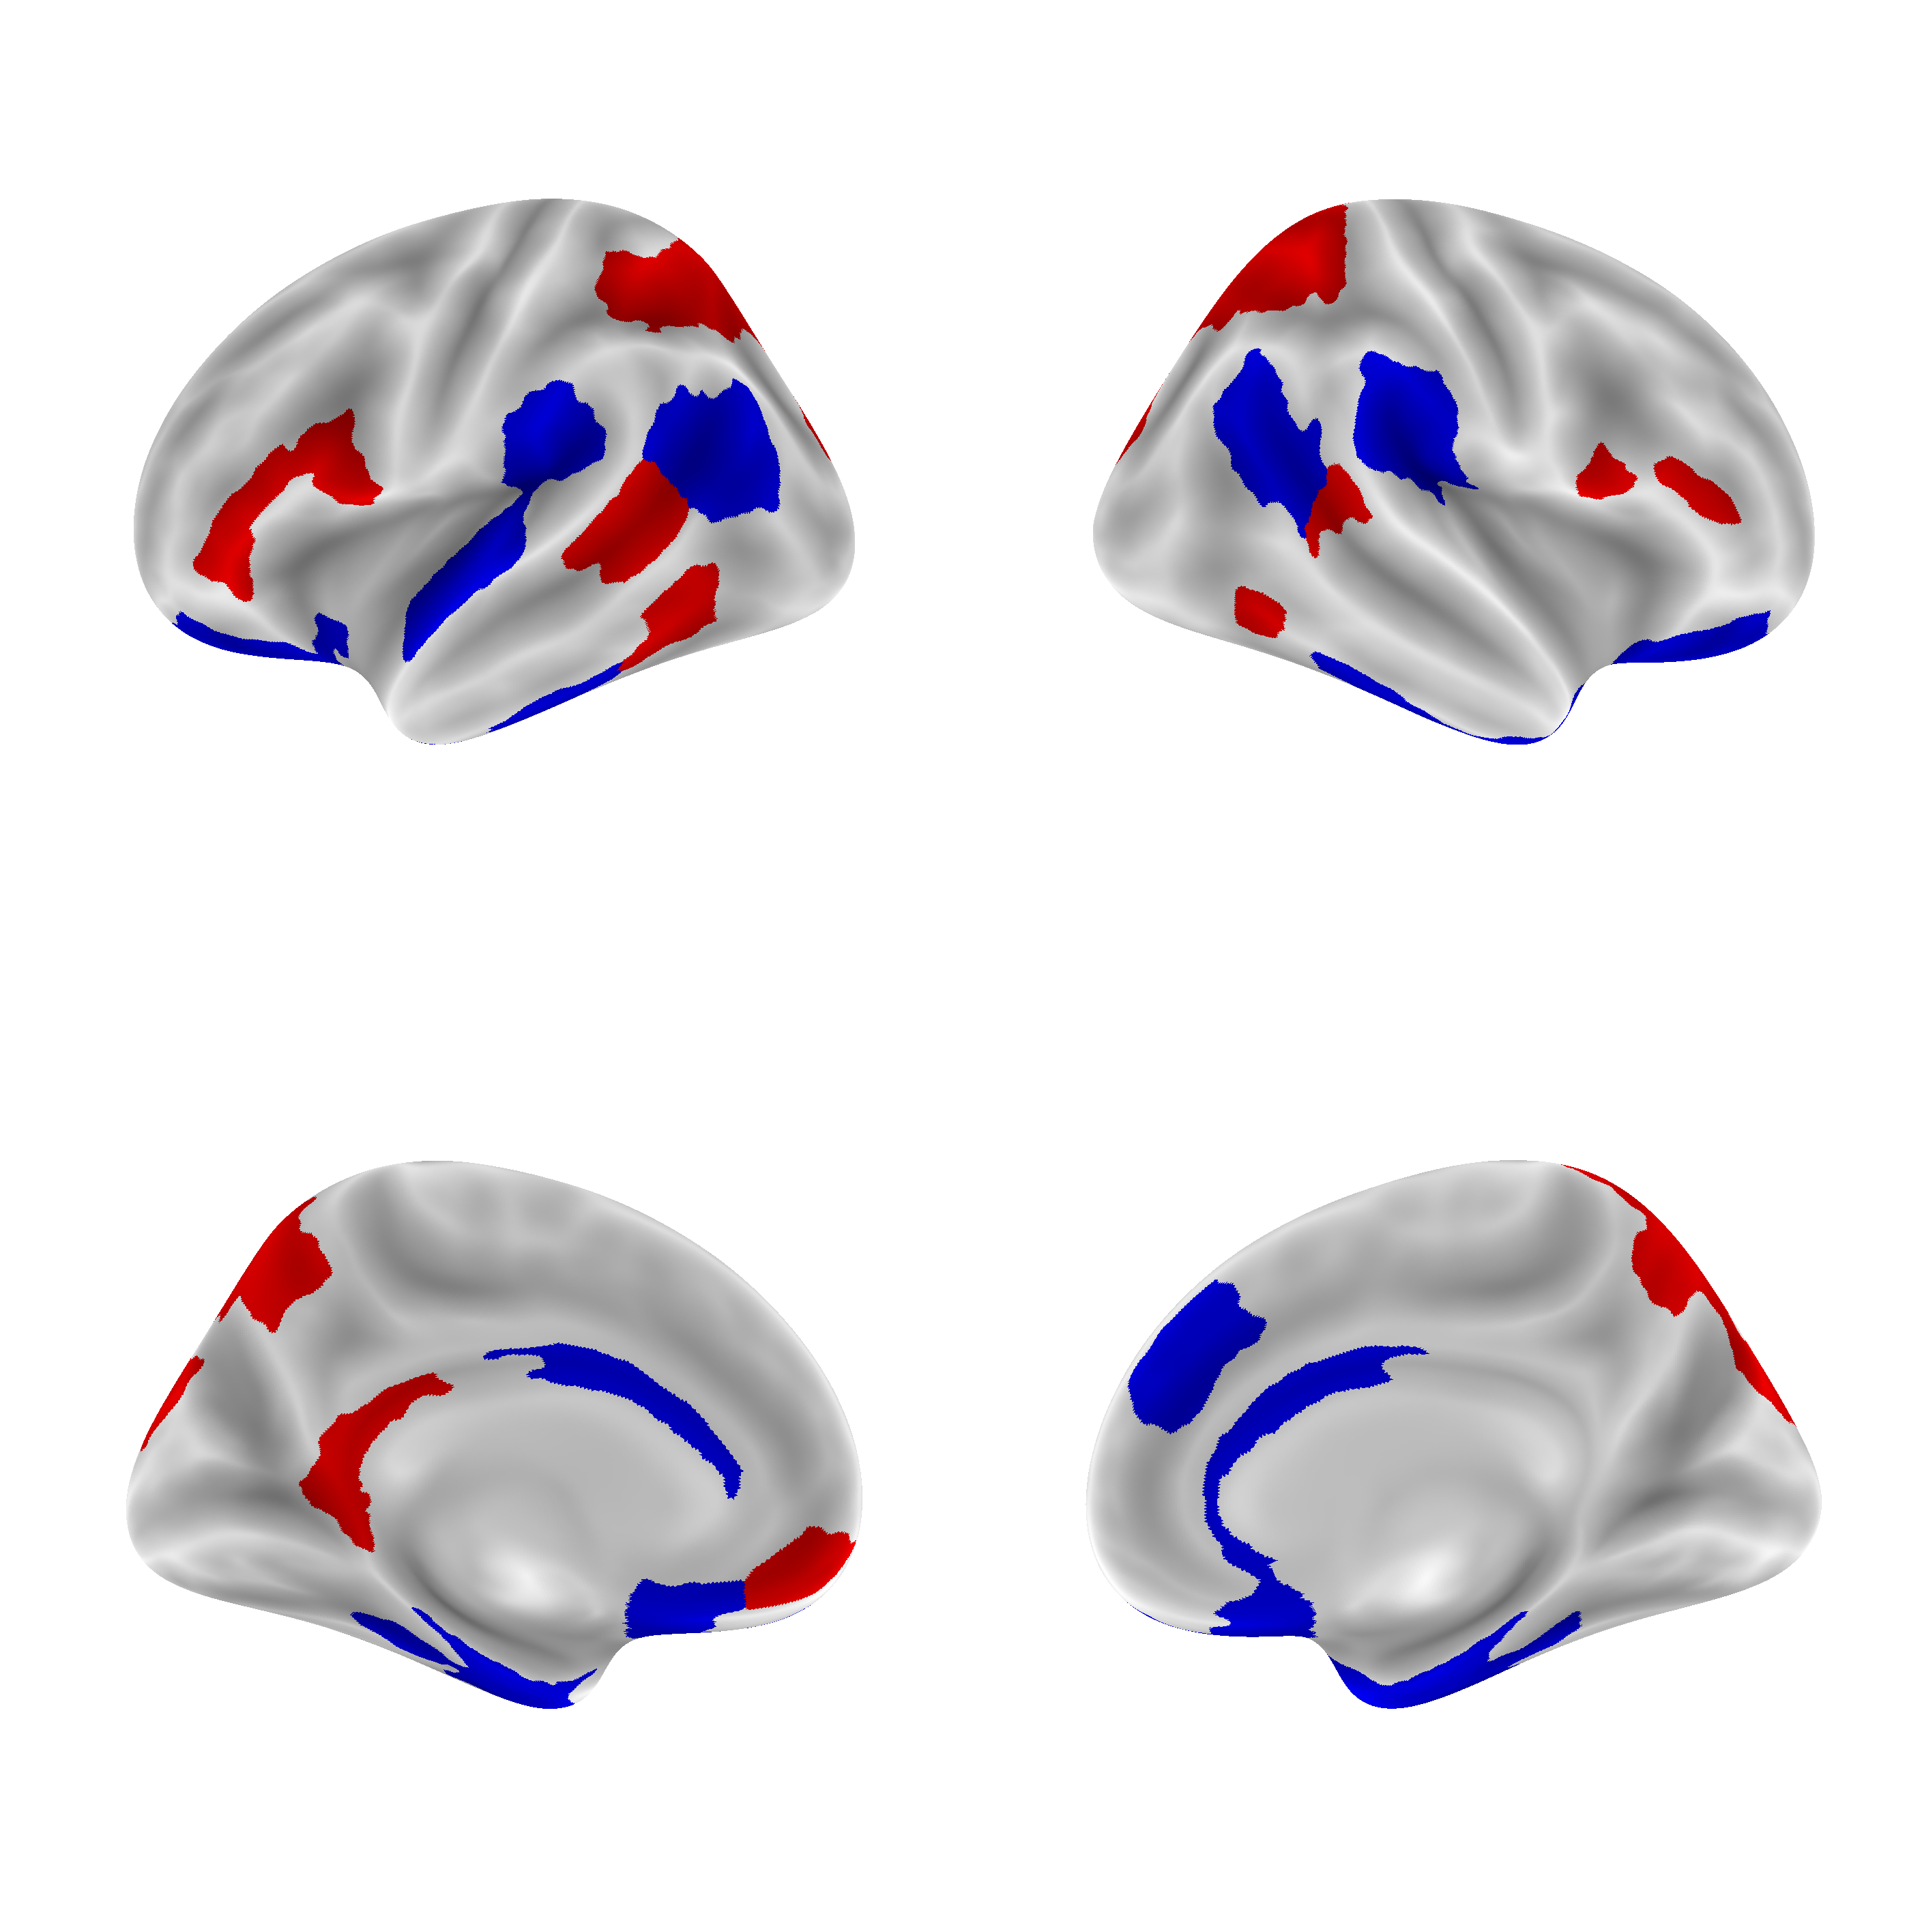

In [74]:
map_lh, map_rh, map_max, map_min = gen_surfaces(tb_bdata, idx_lh, idx_rh)
plot_surfaces(lh_infl, map_lh, lh_sulc, rh_infl, map_rh, rh_sulc, 'bwr', -1, 1)